In [1]:
pip install ucimlrepo

In [2]:
#Summary of dataset - Feature Types and Missing Value Check

from ucimlrepo import fetch_ucirepo

#Access to the dataset
higher_education_students_performance_evaluation = fetch_ucirepo(id=697)

# Data as Panda dataframes
X = higher_education_students_performance_evaluation.data.features
y = higher_education_students_performance_evaluation.data.targets

# Number of rows and columns
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)

# Total number of samples
print("Number of samples:", X.shape[0])

# Total number of features (columns)
print("Number of features:", X.shape[1])

# Metadata - General info about the dataset
print(higher_education_students_performance_evaluation.metadata)

# Variable information - Info about variables and whether there are missing values
print(higher_education_students_performance_evaluation.variables)



Features shape (X): (4424, 36)
Target shape (y): (4424, 1)
Number of samples: 4424
Number of features: 36
{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category 

In [4]:
#Distribution of feature types

import pandas as pd
from ucimlrepo import fetch_ucirepo

# Step 1: Load the dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features

# Data type of each column
dtypes = X.dtypes

#Count by type
num_int = (dtypes == 'int64').sum()
num_float = (dtypes == 'float64').sum()
num_object = (dtypes == 'object').sum()

print("Counts for each feature type:")
print(f"Integer features: {num_int}")
print(f"Continuous (float) features: {num_float}")
print(f"Categorical (object) features: {num_object}")

Counts for each feature type:
Integer features: 29
Continuous (float) features: 7
Categorical (object) features: 0


In [5]:
#Corrleation between the numeric features to the target variable using Pearson correlation

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder

# Load dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features
y = dataset.data.targets

# Encode target labels - converting categorical labels into numeric codes & turning the numpy array to a 1-dimensional array
y_encoded = LabelEncoder().fit_transform(y.values.ravel())

# Pearson correlation for numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
correlation_df = X[numeric_cols].corrwith(pd.Series(y_encoded)).abs().sort_values(ascending=False).to_frame(name='Correlation')

# Show results
print("Pearson Correlation (Numeric Features):\n", correlation_df)

Pearson Correlation (Numeric Features):
                                                 Correlation
Curricular units 2nd sem (approved)                0.624157
Curricular units 2nd sem (grade)                   0.566827
Curricular units 1st sem (approved)                0.529123
Curricular units 1st sem (grade)                   0.485207
Tuition fees up to date                            0.409827
Scholarship holder                                 0.297595
Age at enrollment                                  0.243438
Debtor                                             0.240999
Gender                                             0.229270
Application mode                                   0.221747
Curricular units 2nd sem (enrolled)                0.175847
Curricular units 1st sem (enrolled)                0.155974
Admission grade                                    0.120889
Displaced                                          0.113986
Previous qualification (grade)                     0.103764

In [8]:
# Mean and Correlation
# Select continuous and integer columns
numeric_X = X.select_dtypes(include=['int64', 'float64'])

# Calculate mean and standard deviation
means = numeric_X.mean()
stds = numeric_X.std()

# Combine into one DataFrame
summary = pd.DataFrame({
    'Mean': means,
    'Standard Deviation': stds
})

#summary
print("Mean and Standard Deviation of Each Feature:")
print(summary)

Mean and Standard Deviation of Each Feature:
                                                       Mean  \
Marital Status                                     1.178571   
Application mode                                  18.669078   
Application order                                  1.727848   
Course                                          8856.642631   
Daytime/evening attendance                         0.890823   
Previous qualification                             4.577758   
Previous qualification (grade)                   132.613314   
Nacionality                                        1.873192   
Mother's qualification                            19.561935   
Father's qualification                            22.275316   
Mother's occupation                               10.960895   
Father's occupation                               11.032324   
Admission grade                                  126.978119   
Displaced                                          0.548373   
Educationa

Target Distribution:
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


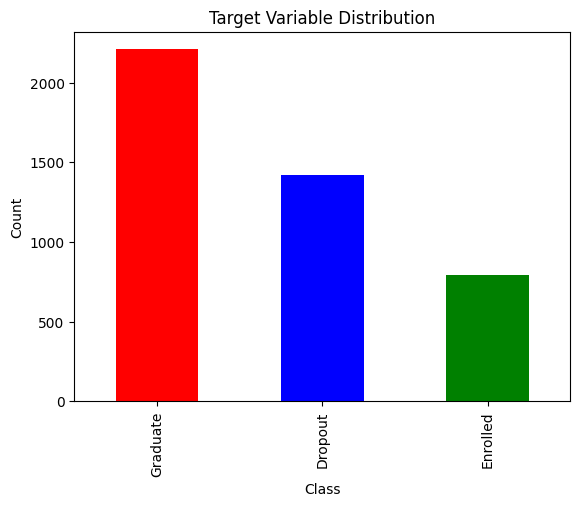

In [10]:
# Distribution of variables in target column

from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset = fetch_ucirepo(id=697)
y = dataset.data.targets

# Flatten to 1D array
y = y.values.ravel()

# Show value counts
counts = pd.Series(y).value_counts()
print("Target Distribution:")
print(counts)

# Plot
counts.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Target Variable Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [11]:
#Percetnage of students who drop out

# Load dataset
dataset = fetch_ucirepo(id=697)
df = dataset.data.original
df.columns = df.columns.str.strip()

# Drop rows with missing 'Target'
df = df.dropna(subset=['Target'])

# Total number of students
total_students = df.shape[0]

# Number of dropouts
num_dropouts = (df['Target'] == 'Dropout').sum()

# Percentage calculation
dropout_percentage = (num_dropouts / total_students) * 100

print(f"Total students: {total_students}")
print(f"Number of dropouts: {num_dropouts}")
print(f"Dropout rate: {dropout_percentage:.2f}%")

Total students: 4424
Number of dropouts: 1421
Dropout rate: 32.12%


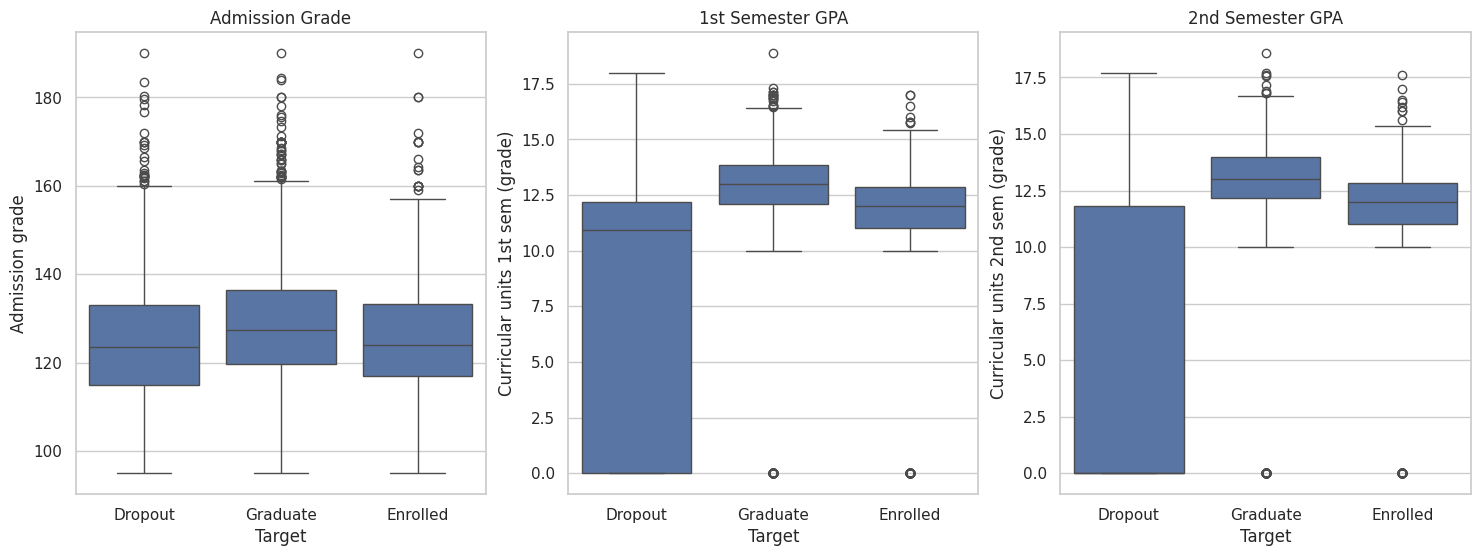

In [12]:
#Grade distribution under each target variable - Dropout/Enrolled/Graduate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
dataset = fetch_ucirepo(id=697)
df = dataset.data.original

# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing data in required columns
cols_to_plot = [
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Target'
]
df_filtered = df.dropna(subset=cols_to_plot)

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot GPA distribution by target (Dropout/Enrolled/Graduate)
sns.boxplot(data=df_filtered, x='Target', y='Admission grade', ax=axes[0])
axes[0].set_title('Admission Grade')

sns.boxplot(data=df_filtered, x='Target', y='Curricular units 1st sem (grade)', ax=axes[1])
axes[1].set_title('1st Semester GPA')

sns.boxplot(data=df_filtered, x='Target', y='Curricular units 2nd sem (grade)', ax=axes[2])
axes[2].set_title('2nd Semester GPA')

plt.show()

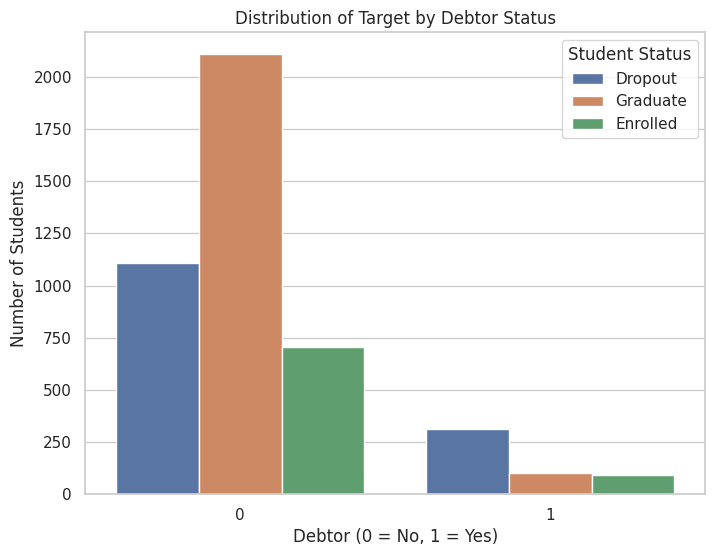

Percentage of each outcome by Debtor status:
Target  Dropout  Enrolled  Graduate
Debtor                             
0         28.28     17.95     53.76
1         62.03     17.89     20.08


In [17]:
#Distribution of Target by Debtor Status

# Drop rows with missing values in the key columns
df_filtered = df.dropna(subset=['Debtor', 'Target'])

# Count plot: How Target is distributed within Debtor = 0 vs Debtor = 1
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_filtered, x='Debtor', hue='Target')
plt.title("Distribution of Target by Debtor Status")
plt.xlabel("Debtor (0 = No, 1 = Yes)")
plt.ylabel("Number of Students")
plt.legend(title="Student Status")
plt.show()

# Calculate proportions
cross_tab = pd.crosstab(df_filtered['Debtor'], df_filtered['Target'], normalize='index') * 100
print("Percentage of each outcome by Debtor status:")
print(cross_tab.round(2))


In [19]:
#Percentage of students who are scholarship recipients

# Drop rows with missing Scholarship holder info
df = df.dropna(subset=['Scholarship holder'])

# Convert to integer
df['Scholarship holder'] = df['Scholarship holder'].astype(int)

# Total students and scholarship recipients
total_students = df.shape[0]
num_scholarship_recipients = (df['Scholarship holder'] == 1).sum()

# Calculate percentage
percentage = (num_scholarship_recipients / total_students) * 100

print(f"Percentage of students who are scholarship recipients: {percentage:.2f}%")

Percentage of students who are scholarship recipients: 24.84%


In [20]:
#Percentage of scholarship holders who dropped out:

# Drop rows with missing relevant values
df = df.dropna(subset=['Scholarship holder', 'Target'])

# Convert Scholarship holder to integer if needed
df['Scholarship holder'] = df['Scholarship holder'].astype(int)

# Filter scholarship holders
scholarship_df = df[df['Scholarship holder'] == 1]

# Count how many of them dropped out
dropout_count = (scholarship_df['Target'] == 'Dropout').sum()
total_scholarship = scholarship_df.shape[0]

# Calculate percentage
dropout_percentage = (dropout_count / total_scholarship) * 100

print(f"Percentage of scholarship holders who dropped out: {dropout_percentage:.2f}%")

Percentage of scholarship holders who dropped out: 12.19%


In [21]:
#Percentage of dropout students with unpaid tuition:

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['Target', 'Tuition fees up to date'])

# Filter for dropout students
dropout_df = df[df['Target'] == 'Dropout']

# Count those with tuition fees NOT up to date (i.e., = 0)
not_paid_count = (dropout_df['Tuition fees up to date'] == 0).sum()
total_dropout = dropout_df.shape[0]

# Calculate percentage
percentage = (not_paid_count / total_dropout) * 100

print(f"Percentage of dropout students with unpaid tuition: {percentage:.2f}%")

Percentage of dropout students with unpaid tuition: 32.16%


In [14]:
#Dropout students with unpaid tuition and scholarships

# Drop rows with missing data
df = df.dropna(subset=['Target', 'Tuition fees up to date', 'Scholarship holder'])

# Convert scholarship to integer
df['Scholarship holder'] = df['Scholarship holder'].astype(int)

# Filter for dropout students
dropout_df = df[df['Target'] == 'Dropout']

# Filter dropout students with tuition not up to date and scholarship
condition = (dropout_df['Tuition fees up to date'] == 0) & (dropout_df['Scholarship holder'] == 1)
count = condition.sum()
total_dropout = dropout_df.shape[0]

# Calculate percentage
percentage = (count / total_dropout) * 100

print(f"Number of dropout students with unpaid tuition and scholarships: {count}")
print(f"Percentage of dropout students in this group: {percentage:.2f}%")

Number of dropout students with unpaid tuition and scholarships: 28
Percentage of dropout students in this group: 1.97%
